# Sediment Size Analysis by Sieve (SedSAS) Class 

## Part I: Introduction:

SedSAS is a class object written in the Python programming (scripting) language. Its purpose is to provide a set of basic software-based statistical and visualization tools for analyzing unconsolidated sediment size-fraction samples collected in the field and separated using either mechanical sieves or similar analog partition-by-size methods. 

The script is a stand-alone ASCII-compliant text file with UNIX record delimiters (\n). It can be called via user-built Python scripts (using this guide to get the user started), or through environments such as this one (Jupyter notebooks). In addition to this notebook, a small collection of sample scripts are supplied in this repository to make both learning and using the SedSAS class as simple and unobtrusive as possible. 

You can use this notebook not only as a learning tool but also as a template from which to directly conduct your own analyses. The notebook can be modified, or copied and then the copy modified, as you see fit. 

### What can the SedSAS class do:

**From a sample file of fractional ($\phi$) weights compiled from sediment partitioned by size (via mechanical sieving or similar), the methods in the SedSAS Class can do the following:**
- compute weight percentages and cumulative weight percentages for each $\phi$ fraction relative to the total sample
- derive and compute the mean, median, and sorting (standard deviation) in $\phi$ units using the graphic method described by Folk and Ward (1957) and Folk (1980). This is perhaps the most widely used method among sedimentologists
- compute the mean and sorting (standard deviation) in $\phi$ units using the method of moments (MoM) as described by Folk (1980)
- derive the distribution's modes in $\phi$ and weight percentage units
- generate a histogram (bins=#sieves) with frequency curve and cumulative frequency curve for sample weight percentages and cumulative weight percentages

- compute weight and cumulative weight percentages, graphic and MoM statistics and modes, and write these results either to standard out or to a comma-separated text file


The phi unit is related to particle diameters (in mm) as: $\phi = -log_2 d$

The 4 principal statistical moments are leveraged to describe particle sizes and their distributions:

- 1st Moment: central tendancy (average grain size)
- 2nd Moment: spread or variabililty (grain sorting around the average)
- 3rd Moment: symmetry of the data about the average (skewness)
- 4th Moment: concentration of data about the average (kurtosis)

#### The logarithmic graphical statistics computational formulae used by the SedSAS Class [Method: ComputeFWLogarithmicGraphicStats()]

##### (per Folk and Ward, 1957 and Folk, 1980):
_This is the most commonly used particle size analysis method_

$$ \text{mean}={ \phi_{16} + \phi_{50}+\phi_{84} \over 3 } $$
<br>
$$ \text{inclusive standard deviation (sorting)} = {\phi_{16} + \phi_{84} \over 4} + {\phi_{95} - \phi_{5} \over 6.6 } $$
<br>
$$ \text{inclusive skewness} = {\phi_{16} + \phi_{84} - 2\phi_{50} \over 2(\phi_{84} - \phi_{16}) } + {\phi_{5} + \phi_{95} - 2\phi_{50} \over 2(\phi_{95} - \phi_{5}) } $$
<br>
$$ \text{kurtosis} = {\phi_{95} - \phi_{5} \over 2.44(\phi_{75} - \phi_{25}) } $$ 


Units: $\phi$

#### The geometric graphical statistics computational formulae used by the SedSAS Class [Method: ComputeFWGeometricGraphicStats()]

##### (per Folk and Ward, 1957):

$$ \text{mean}={ lnP_{16} + lnP_{50}+lnP_{84} \over 3 } $$
<br>
$$ \text{standard deviation (sorting)}={lnP_{16} + lnP_{84} \over 4} + {lnP_{95} - lnP_{5} \over 6.6 } $$
<br>
$$ \text{skewness} = {lnP_{16} + lnP_{84} - 2lnP_{50} \over 2(lnP_{84} - lnP_{16}) } + {lnP_{5} + lnP_{95} - 2lnP_{50} \over 2(lnP_{95} - lnP_{5}) } $$
<br>
$$ \text{kurtosis} = {lnP_{95} - lnP_{5} \over 2.44(lnP_{75} - lnP_{25}) } $$ 
<br>
where: $p$ is the particle diameter for that quantile in mm ($d=2^\phi$)

Units: mm

#### The method of moment computational statistics formulae used by SedSAS Class (per Folk, 1980):

### SECTION UNDER CONSTRUCTION...

$$ \phi \enspace arithmetic \enspace mean \enspace (M_{\phi}) = {\sum{DW} \over \sum{W} }  $$
<br><br>
$$ standard \enspace deviation \enspace (\sigma_{\phi}) = \sqrt{\sum{[W(M_{\phi}-D)^2] } \over \sum{W}} $$
<br>
<br>
**where:**<br>
- D = sieve size fraction (bin) mid-point <br>
- W = sieve size fraction weight (in grams) <br>
- M$\phi$ = the computed method of moments mean

**References:** 'Folk, R. 1980. Petrology of Sedimentary Rocks. Hemphill Publishing Company, Austin, TX. 184p.

## Part II Using the SedSAS Class

### Guide to understanding and using the SedSAS Class:<a name="Guide"></a>

This is a basic but hopefully sufficient guide to setting up and using the SedSASClass for analyzing sediment sample data. Click on the links for more information and example(s)

- #### Preliminaries:
    - Required Python (Part I): The SedSASClass, this notebook, and all supporting materials were developed in a Python 3.x environment. Neither the class nor any of these supporting materials have been tested using a Python 2.x distro. *Backward compatibility is expected, but not assured.*
    
    - Required Python (Part II): If you do not have Python (version 3.), your best bet for a trouble-free install experience can be had here: Continuum Analytics: https://www.continuum.io Anaconda. If you're more adventurous, try the Python Software Foundation: https://www.python.org/getit/. 
    
    - [Required external Python Libraries and modules](#Required Libraries) List of required installed Python libraries (e.g., numpy, scipy, pandas) needed by the SedSASClass
    
    - [User inputs](#User Inputs) Information to be provided by the user, needed to initiate and use the class
    
    - [Structuring Input Data](#Structuring) This very important step prepares the raw sediment weights data for loading into the pandas data frame that will passed to SedSAS class at instantiation. 

    - [Reading the source data into the pandas data frame](#Readingthesource): Loading the source data
    
    - [Creating a SedSAS class instance](#instantiatingclass): creating an instance of the SedSAS class. You must create this instance before you can call any of the methods that follow.
    
- #### User-callable Class Methods:
    - Computational Methods:
        - [InterpolateQuantileValues](#InterpolateQuantileValues): interpolates/extrapolates the sample data values for the 5th, 10th, 16th, 25th, 50th, 75th, 86th, 90th, and 95th quantiles (per Folk, 1980). Quantiles are required for statistics generated by: ComputeFWLogarithmicGraphicStats andComputeFWGeometricGraphicStats. Both methods call InterpolateQuantileValues internally during execution. The user will generally have no need to call this method, but can do so if desired.
<br>    
        - [ComputeFWLogarithmicGraphicStats](#log graphic stats): compute logarithmic graphical statistics (mean, sorting (standard deviation), skewness, and kurtosis) for the sample data as described by Folk and Ward, 1957, Folk, 1980 and others. _This has long been the most common method used in sedimentology to characterize sediment particle size._
<br>    
        - [ComputeFWGeometricGraphicStats](#geom graphic stats): compute geometric graphical statistics (mean, sorting (standard deviation), skewness, and kurtosis) for the sample data as described by Folk and Ward, 1957.
<br>    
        - [ComputeArithmeticMethodofMomentsStats](#arithmetic moment stats): computes the mean, sorting (standard deviation), skewness, and kurtosis for the sample data using the arithmetic method of moments (Ref).
<br>    
        - [ComputeGeometricMethodofMomentsStats](#geometric moment stats): computes the mean, sorting (standard deviation), skewness, and kurtosis for the sample data using the geometric method of moments (Ref).
<br>    
        - [ComputeLogarithmicMethodofMomentsStats](#logrithmic moment stats): computes the mean, sorting (standard deviation), skewness, and kurtosis for the sample data using the logrithmic method of moments (Ref).
<br>    
        - [FindSampleModes](#sample modes): locates and reports [up to] the first three sample mode values seen in the sample data
    <br><br>
    - Plotting and Console Reporting Methods:
        - [PrintSampleWeightsDataTable](#print weight data table): prints the sample weights, percent sampled weights, cumulative weights, and sample quantile values to standard out.
<br>    
        - [PrintGraphicStats](#print graphic stats): prints the graphical statistics generated by method ComputeLogGraphicStats and ComputeGeomGraphicStats, formatted to standard out (console). _This is an internal method not usually called directly by the user_.
<br>    
        - [PrintMomentStats](#print moment stats): prints the method of moment based statistics generated by method ComputeMomentStats formatted to standard out (console)
<br>    
        - [PrintSampleModes](#print sample modes): prints the modal values detected in the data by method FindSampleModes formatted to standard out (console). THIS METHOD IS DEPRECATED AND WILL BE REMOVED IN A FUTURE VERSION OF THE CLASS.
<br>    
        - [PLOTSampleWtPercents](#plot sample weight percents): generates a histogram of weight percentage values for given sample as generated in the class constructor (__init__) and stored in the dataframe df
<br>    
        - [PLOTSampleCumWtPercents](#plot cum weight percents): generates a cumulative frequency curve (line) of weight percentage values for given sample as generated in the class constructor (__init__) and stored in the dataframe df
<br>    
        - [PLOTDualSampleWeightPercents](#plot dual sample weights): generates both a histogram and a cumulative frequency curve (line) of weight percentage values for given sample as generated in the class constructor (__init__) and stored in the dataframe df. This is a convenience method that combines the work of PLOTSampleWtPercents and PLOTSampleCumWtPercents into a single function call.
<br><br>
    - General Methods:
        - [GetDataFrame](#get data frame): returns a copy to the pandas data frame df that is built in the SedSASampleClass constructor during initialization and is used throughout the class methods for subsequent computations and reporting. This method will likely prove to be useful when calling SedSASampleClass methods directly (rather than doing streamlined processing-see below).
<br>
        - [GetQuantileList](#get quantile list) returns a Python list of interpolated/extrapolated values for the 5th, 10th, 16th, 25th, 50th, 75th, 86th, 90th, and 95th quantiles, based on the CDF. 
<br><br>

- #### Sample Scripts:
    - General Methods:
        - [Sample Scripts](#sample scripts): A set of sample scripts purposed to teach, to guide, to use, and even to grow, the Sediment Size Analysis by Sieve methods stack.

## Part III: Using the class:

#### a.) Required libraries and modules:<a name="Required Libraries"></a>

The SedSASClass will call and attempt to load into the class namespace the following Python libraries:

- sys
- pandas
- numpy
- matplotlib.pyplot

These should be installed in your Python environment prior to working with the SedSASClass. Note that the class itself will call these at instantiation.

If your script is in a directory other than the same one where the SedSASClass file itself is stored you will have to amend the system's path variable (only for this namespace and only while the current namespace exists). You can do this with the sys.path.append command:

        import sys
        sys.path.append(' </path/to/class/location/> ')

        import sys
        sys.path.append('/Users/Documents/projects/myproject')
      
        where the SedSASClass.py file resides in the myproject directory
        
        
        
[Back to Guide](#Guide)

#### b.) Required User Inputs: <a name="User Inputs"></a>

Here's what you need to provide up front in order to make use of the class

    1.) full (absolute) path pointing to the sediment sample weights data file(s)
    2.) name of the sediment sample weights data file(s) (w/extension(s)). This/these is/are the file(s) that contains all of your sieved sample weights. Note, if there are more than one, as is often the case, you can put each file name in a Python list and feed the file names, on at a time, using a looping scheme.
    3.) A unique identifier for the sample. Note that SedSAS doesn't really care if you provide a unique identifier, nor is it particular about how you choose to format the id. In fact, the identifier is more for the user and user tracking than for code execution and so from a functional point of view, not even a requiremment. Nevertheless, it makes sense to provide something that helps to track what's in process. If you wish to forego an id, the class will assign the default 'my_sample' as id.
    4.) A list of the sieve [screen] sizes (in phi units), sorted from coarse to fine, used in the analysis in a Python list
    
<br>
Here's an example (# indicates a comment; Python code is italicized):

\# ###### USER INPUTS Example ##########################################################
\# <br>
1.) Absolute (full) path to the file(s) containing the data to be analyzed: <br>
*fp='./'*

\# 2.) The name of the file(s) containing the data to be analyzed: <br>
*fn='USFWS_t2.txt'*

\# 3.) A unique identifier for the current, or for each sample processed
id ='sample1'

\# 4.) Sieve screen sizes used list. You can modify the existing list as needed to reflect the sieves 
\# used. Values represent phi screen units: <br>
*scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]*

[Back to Guide](#Guide)

 #### c.) Structuring the input data <a name="Structuring"></a>
 
 Perhaps the most difficult aspect of working with this notebook and the SedSASClass is getting your data into a form that can be passed into the class init method (the constructor) during class instantiation. The reason behind the possible difficulty is that the data, **which you will submit to the class constructor as a Pandas data** frame, needs only select information, probably much less than you captured as part of your lab analyses. Here's what you'll need in the dataframe supplied as input to the class during instantiation: 

- just, and only, the individual sieved sample weights. Weights units are assumed to be grams but the actual weight units have no bearing on the computations carried out in SedSASampleClass. Sizes are assumed $\phi$. The dataframe passed to SedSAS will be formatted similar to:

    Phi_0, Phi_5, Phi_1,...,Phi_5

from here, you can use a Pandas method such as read_csv or read_table to load your raw data into a data frame. Optionally, you can read your raw data from a Microsoft Excel spreadsheet using the Pandas read_xls method. Examples are provided elsewhere in this notebook.

[Back to Guide](#Guide)

### c.) Reading the source data into a pandas data frame: <a name="Readingthesource"></a>

In order to be able to create an instance of the SedSAS class you first must load your source data into a pandas data frame. Fortunately, this is a simple, often single-line, process. Once the source data is loaded,you must re-work the data in the data frame so that only the requisite raw weight columns remain:

- Transect id, Sample id, individual sieved fraction weights for each sample from coarsest to finest--one screen weight per column. 

Example  (# indicates a comment; Python code is italicized):

*import pandas as pd*

\# reads the csv file located at: /fp/fn into a new pandas data frame named df <br>
*df = ps.read_csv(fp+fn)* 


[Example: dataframe from comma separated values (csv) file:](#Src2DF_CSV) <br/>
[Example: dataframe from generic ASCII text file:](#Src2DF_TBL) <br/>
[Example: dataframe from SQLite database:](#Src2DF_SQL) <br/>
[Example: dataframe from Microsoft Excel spreadsheet:](#Src2DF_XLS) <br/>

[Back to Guide](#Guide)

** d1.) Reading data from a comma-separated value (csv) file:** <a name="Src2DF_CSV"></a>
[Go Back](#Readingthesource)

In [29]:
### Pandas dataframe built from a comma separated text file:
import pandas as pd

file_name='./SampleScripts/DrySieveResults.csv'

## first, read the entire file into the new dataframe:
df = pd.read_csv(file_name )

## then,  subset df to leave behind only those columns necessary for inclusion in SedSAS:
## iloc finds groups of rows and columns based on position index. For instance, [0:1,3:] will retrieve the first row
## for column numbers 3 and beyond. To see an example comment out the next line (place a # in front) and run the 
## cell. Notice the rows and columns. Then, uncomment the line and run again. See the difference?
df = df.iloc[0:1,3:].copy()
df

,phi_n225,phi_n1,phi_n05,phi_00,phi_05,phi_10,phi_15,phi_20,phi_25,phi_30,phi_35,phi_40,dryfines
0,0.06,0.96,1.42,2.06,2.58,3.57,2.7,3.1,3.21,3.99,2.27,0.78,0.43


** d2.) Reading data from a generic ASCII text file**<a name="Src2DF_TBL"></a>
[Go Back](#Readingthesource)

In [28]:
### Pandas dataframe built from a generic ASCII text file: 
### Here we specify the record delimiter (here the delimiter is a tab) in the call to create the dataframe...
import pandas as pd

file_name='./SampleScripts/DrySieveResults.dat'

## first, read the entire file into the new dataframe:
df = pd.read_table(file_name, sep='\t' )    # where \t is the tab character, ASCII 09

## parse to keep only the first row (or the row you wish to submit for processing) and those columns needed 
## to feed SedSAS:
df = df.iloc[0:1,3:].copy()
df

,phi_n225,phi_n1,phi_n05,phi_00,phi_05,phi_10,phi_15,phi_20,phi_25,phi_30,phi_35,phi_40,dryfines
0,0.06,0.96,1.42,2.06,2.58,3.57,2.7,3.1,3.21,3.99,2.27,0.78,0.43


** d3.) Reading data from a SQLite database**<a name="Src2DF_SQL"></a>
[Go Back](#Readingthesource)

In [30]:
### Pandas dataframe built from a SQLite database table: 
import pandas as pd
import sqlite3

db_name='./SampleScripts/SieveAnal.db'
tbl_name='SieveResults'

## first, extablish a connection between your script and the database:
con=sqlite3.connect(db_name)

## then, read the data table (of interest) into the new dataframe:
df = pd.read_sql_query("SELECT * from "+tbl_name, con)

## close the connection:
con.close()

## parse to keep only the first row (or the row you wish to submit for processing) and those columns needed 
## to feed SedSAS:
df = df.iloc[0:1,3:].copy()
df

,phi_n225,phi_n1,phi_n05,phi_00,phi_05,phi_10,phi_15,phi_20,phi_25,phi_30,phi_35,phi_40,dryfines
0,0.06,0.96,1.42,2.06,2.58,3.57,2.7,3.1,3.21,3.99,2.27,0.78,0.43


** d4.) Reading data  from a Microsoft Excel spreadsheet**<a name="Src2DF_XLS"></a>
[Go Back](#Readingthesource)

In [31]:
import pandas as pd

file_path='./SampleScripts/SievingData.xlsx'
sheet=0                                          # the name (if given) or position number of the sheet to be read
                                                 # in the spreadsheet file spec'd by file_path. Default is first (0)

## Read sheet 
df = pd.read_excel(file_path, sheet_name=sheet)

## parse to keep only the first row (or the row you wish to submit for processing) and those columns needed 
## to feed SedSAS:
df = df.iloc[0:1,3:13].copy()
df

,pan weight 1,pan weight 2,dry weight 1,dry weight 2,Fines (g),Clays (g),Silts (g),% Fines,% Clays,% Silts
0,1.0211,1.0614,1.5069,1.3042,0.4858,0.2428,NaN,NaN,NaN,NaN


#### e.) Creating an instance of the SedSAS Class: <a name="instantiatingclass"></a>

When you instantiate the SedSASampleClass in your project you will send a copy of the Pandas dataframe that you create from your raw data, along with a sample id, and sieve screen size (mesh) list to the constructor (__init__) method. The calls to load and instantiate the class looks like this (Python code is italicized):

*import SedSASClass* <br>
*sc = SedSASClass.SedSAS(id, df, scrns)*

** Note that you must create an instance (only need one) of SedSAS before you can call any of its methods (functions)**

** Also note that SedSAS only accepts and processes a SINGLE SAMPLE AT A TIME. If you want to batch process you
can set up a looping scheme with an instance of SedSAS created with each loop iteration--very important!**

The [Sample Scripts](#sample scripts) section of this notebook demonstrates instantiation, and further usage of the SedSAS class methods, in detail.


[Back to Guide](#Guide)

### Class Method Definitions/Descriptions:

#### Method: InterpolateQuantileValues <a name="InterpolateQuantileValues"></a> 

interpolate/extrapolate 5th, 10th, 16h, 25th, 50th, 75th, 84th, 90th, 95th quantiles for sample. Note that calls to this function are not required by the user.

**call:** D = sc.InterpolateQuantileValues()

sc. is the class instance

Quantiles computed: [5,10,16,25,50,75,84,90,95] are based on requirements from Folk, (1980). These values are fixed internally.
		
**Input args:** none

**Returns:** Interpolated/extrapolated quantiles, sorted ascending, in a Python list

**Return units:** $\phi$

               
[Back to Guide](#Guide)

In [ ]:
### EXAMPLE: calling method InterpolateQuantileValues for a single transect:

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        print('Quantiles for Sample:', key, '=', val)

#### Method: ComputeFWLogarithmicGraphicStats <a name="log graphic stats"></a> 

computes the logarithmic "graphic" mean, inclusive standard deviation (sorting), inclusive skewness, and kurtosis (per Folk and Ward, 1957; Folk, 1980; and many others) for a given sample. These are the classic graphically-generated particle-size statistics used throughout geomorphology, sedimentology, and other geoscience subfields.

<br>
**call:** gs=sc.ComputeFWLogarithmicGraphicStats( )

sc. is the class instance

**Input args:** None
<br>

**Returns:** Python list containing [0]=mean, [1]=median, [2]=sorting, [3]=skewness, [4]=kurtosis
<br>      

**Returned units:** $\phi$ for mean and sorting, none for skewness and kurtosis

[Back to Guide](#Guide)

#### Method: ComputeFWGeometricGraphicStats <a name="geom graphic stats"></a> 

computes the geometric "graphic" mean, standard deviation, skewness, and kurtosis (per Folk and Ward, 1957) for a given transect sample.
<br>

**call:** gs=sc.ComputeFWLogarithmicGraphicStats( )

sc. is the class instance
<br>

**Input args:** None
<br>

**Returns:** Python list containing [0]=mean, [1]=median, [2]=sorting, [3]=skewness, [4]=kurtosis
<br>      

**Returned units:** mm for mean and sorting, none for skewness and kurtosis

[Back to Guide](#Guide)

#### Method: ComputeArithmeticMethodofMomentsStats <a name="arithmetic moment stats"></a> 

computes the mean, standard deviation, skewness, and kurtosis for a given transect sample using the Arithmetic Method of Momments formulae (Ref.).
<br>

**call:** gs=sc.ComputeArithmeticMethodofMomentsStats( )

sc. is the class instance
<br>

**Input args:**None
<br>

**Returns:** Python list containing [0]=mean, [1]=median, [2]=sorting, [3]=skewness, [4]=kurtosis
<br>      

**Returned units:** mm for mean and sorting, none for skewness and kurtosis

[Back to Guide](#Guide)

#### Method: ComputeGeometricMethodofMomentsStats <a name="geometric moment stats"></a> 

computes the mean, standard deviation, skewness, and kurtosis for a given transect sample using Geometric Method of Momments formulae (Ref.).
<br>

**call:** gs=sc.ComputeGeometricMethodofMomentsStats( )

sc. is the class instance
<br>

**Input args:**None
<br>

**Returns:** Python list containing [0]=mean, [1]=median, [2]=sorting, [3]=skewness, [4]=kurtosis
<br>      

**Returned units:** mm for mean and sorting, none for skewness and kurtosis

[Back to Guide](#Guide)

#### Method: ComputeLogarithmicMethodofMomentsStats <a name="logrithmic moment stats"></a> 

computes the mean, standard deviation, skewness, and kurtosis for a given transect sample using Geometric Method of Momments formulae (Ref.).
<br>

**call:** gs=sc.ComputeLogarithmicMethodofMomentsStats( )

sc. is the class instance
<br>

**Input args:**None
<br>

**Returns:** Python list containing [0]=mean, [1]=median, [2]=sorting, [3]=skewness, [4]=kurtosis
<br>      

**Returned units:** $\phi$ for mean and sorting, none for skewness and kurtosis

[Back to Guide](#Guide)

#### Method: FindSampleModes <a name="sample modes"></a> 

locates any, up to the first three, modal weight percentage values in current sample. 
<br>

**call:** modes = sc.FindSampleModes()
<br>

**Input args:**None


**Returns:** Python tuple of modes (if any) found in the current sample. The 0th item contains the mode in phi size 
units. The 1st item is the mode in mm. Up to the first three modes, if they exist, are reported in $\phi$ and mm units
                    
[Back to Guide](#Guide)

In [ ]:
### EXAMPLE: Calling method FindSampleModes (for single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        md=sc.FindSampleModes(key, prt2stdout=True)
        #print('For',key,'up to the first 3 modes resolved (phi and gms):',md)

#### Method: PrintSampleWeightsDataTable <a name="print weight data table"></a> 
<br>
prints the raw, weight percentage, and cumulative weight percentage values in tabular format for each screen bin to standard output (terminal or console window).
<br>

**call:** sc.PrintSampleWeigthsDataTable()

**Input args:** None

**Returns:** None
            
[Back to Guide](#Guide)

In [5]:
### EXAMPLE: calling method PrintSampleWeightsDataTable (for a single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        sc.PrintSampleWeightsDataTable(key)


Processing transect: T2


--------------------------------------------------------------
--------------------------------------------------------------
Sample Weights Table 	 Transect:  T2 	 Sample:  S1
--------------------------------------------------------------
            phi  Raw Wt (gm)   Wt.%  Cum. Wt.%
-1.0phi   -1.00        37.89  44.82      44.82
-0.5phi   -0.50        23.31  27.58      72.40
0phi       0.00        12.74  15.07      87.47
0.5phi     0.50         4.40   5.21      92.68
1.0phi     1.00         2.25   2.66      95.34
1.25phi    1.25         0.52   0.62      95.95
1.5phi     1.50         0.99   1.17      97.13
1.75phi    1.75         0.37   0.44      97.56
2.0phi     2.00         0.93   1.10      98.66
2.5phi     2.50         0.57   0.67      99.34
3.0phi     3.00         0.42   0.50      99.83
3.5phi     3.50         0.10   0.12      99.95
remainder  4.00         0.04   0.05     100.00
--------------------------------------------------------------
Sample Quant

#### Method: PrintGraphicStats <a name="print graphic stats"></a> 

Optionally called by methods ComputeLogGraphicStats and/or ComputeGeomGraphicStats via the prt2stdout argument to print the graphic mean, median, standard deviation, skewness, and kurtosis for each transect sample in tabular format to the console. **This method is not usually called directly by the user.**

             
[Back to Guide](#Guide)

#### Method: PrintMomentStats <a name="print moment stats"></a> 

prints the method of moments computed sediment size mean and standard deviation and undifferentiated coarse and fine fractions for the sample in tabular format to the console.

Input args: 
    mStats = Python tuple containing method of moments mean, std. dev., 
			 undiff. coarse fraction weight, undiff fine fraction weight.

Returns: none

Note: the mStats tuple is generated by method self.ComputeMomentStats()
            
[Back to Guide](#Guide)

In [ ]:
### EXAMPLE: calling method PrintMomentStats (for a single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        mms=sc.ComputeMomentStats(key)
        sc.PrintMomentStats(mms)

#### PrntSampleModes <a name="print sample modes"></a>  METHOD IS DEPRECATED 

'''Prints the mode values located in method FindSampleModes to the console

Input args:
     modes = Python dictionary containing key (mode in phi units) and value
					   (mode in weight percent) pairs

Returns: none
		
[Back to Guide](#Guide)

In [ ]:
### Example: calling method PrintSampleModes (for a single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        md=sc.FindSampleModes(key)
        sc.PrintSampleModes(md)

#### Method: PLOTSampleWtPercents <a name="plot sample weight percents"></a> 

plots the individual sample weight percentages, by sieve fraction as a histogram and overprinted frequency (PDF) curve for the current sample. Can plot to console or to stored PNG file.

Input args:
    mode = plot destination: mode='print' plot written to console (default) ;<br>
    mode='save' plot written to png output
     
Returns: none
                                               
[Back to Guide](#Guide)

In [ ]:
### EXAMPLE: Calling method PLOTSampleWtPercents (for a single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        sc.PLOTSampleWtPercents(key)   # mode defaults to 'plot to console'

#### Method: PLOTSampleCumWtPercents <a name="plot cum weight percents"></a> 

plots the individual sample cumulative weight percentages, by sieve fraction as a cumulative frequency (CDF) curve for the current transect sample. Can plot to console or to stored PNG file.

Input args:
    mode = plot destination: mode='print' plot written to console (default) ;<br>
    mode='save' plot written to png output
											   
Returns: none
            
[Back to Guide](#Guide)

In [ ]:
### EXAMPLE: Calling method PLOTSampleCumWtPercents (for a single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        sc.PLOTSampleCumWtPercents(key)   # mode defaults to 'plot to console'

#### Method: PLOTDualSampleWeightPercents <a name="plot dual sample weights"></a> 

plots both the weight percentage and cumulative weight percentage histogram and curves (histo+PDF, and CDF) side by side and together, by sieve fraction for the current transect sample. Can plot to console or to stored PNG file.

Input args:
    mode = plot destination: mode='print' plot written to console (default) ;<br>
    mode='save' plot written to png output
											   
Returns: none

Note: This is just a convenient combination of methods PLOTSampleWtPercents and PLOTSampleCumWtPercents.
                
[Back to Guide](#Guide)

In [ ]:
### EXAMPLE: Calling method PLOTDualSampleWeightPercents (for a single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        sc.PLOTDualSampleWeightPercents(key)   # mode defaults to 'plot to console'

#### Method: GetDataFrame <a name="get data frame"></a> 

returns the sample set data frame df to the caller.

Input args: none

Returns: pandas dataframe for the current sample data
           
[Back to Guide](#Guide)

In [ ]:
### EXAMPLE: Calling method GetDataFrame (for a single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    df = sc.GetDataFrame()
    print(df.head())

#### Method: GetQuantileList <a name="get quantile list"></a> 

Returns a Python list, sorted ascending, of the standard quantile set (5th, 10th, 16th, 25th, 50th, 75th, 86th, 90th, and 95th).

Input args: None

Returns: Python list of quantiles

Return Units: $\phi$
            
[Back to Guide](#Guide)

## Sample Scripts <a name="sample scripts"></a> 

A set of example scripts for use as a resource in learning to use SedSAS. 

        
[Back to Guide](#Guide)

#### Script 1: Computing grain-size statistics for a single user-upplied data sample. Here, the user enters the weights data by hand into the Python list wts:

----------------------------------------------------------------------
Particle-Size Composition Analysis. Processing Sample ID: S1
----------------------------------------------------------------------
Sample mean: -0.34
Sorting: 1.97
Skewness: 0.14
Kurtosis: 0.8



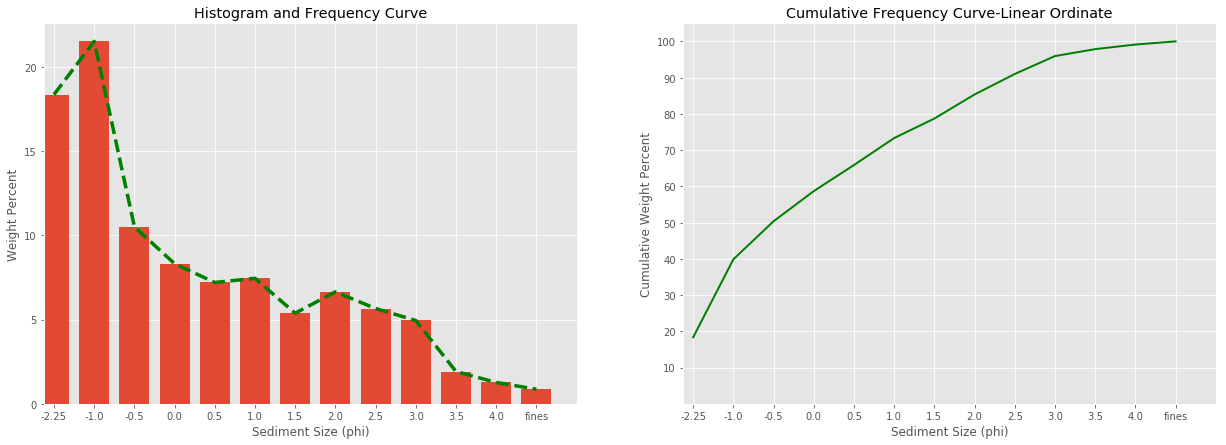

------------------------------------------------------------------------------------------


In [98]:
import pandas as pd      # you note that I import pandas in each cell in this notebook. You don't actually have to
                         # to do this each time. You only need import the library once, usually at or near the top
                         # of your script/notebook.
import numpy as np
import sys
sys.path.append('./')
import SedSASClass

## user-supplied data set in form of Python list (entered by hand)
wts=np.array( [5.94, 6.96, 3.4, 2.69 ,2.33 ,2.41 , 1.74 ,2.15 ,1.83 , 1.6 ,0.62 ,0.41 ,0.28 ] )

screens=[-2.25,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,5.0] 
cols=['phi_n225','phi_n1','phi_n05','phi_00','phi_05',
      'phi_10','phi_15','phi_20','phi_25','phi_30','phi_35','phi_40','dryfines']
ID = 'S1'            # user-supplied id

### create a new dataframe with the user entered data:
### note here we want an array of data that is 1 row and 13, columns in shape as input to df
### but when you create the array it has 13 rows. You need then to reshape to make it 13 rows
### and 1 column, then transpose the array to make it 1 row and 13 columns which is good for
### inout to pd.DataFrame()
df=pd.DataFrame( wts.reshape(13,1).T, columns=cols )

## create a class instance:
ssc = SedSASClass.SedSAS(ID, df, screens )
gs = ssc.ComputeFWLogarithmicGraphicStats()    # call function to compute Folk and Ward "graphic" statistics

### The statistics generating functions in SedSAS return a Python tuple with the contents identified as:
## gs[0] the mean; gs[1] sorting;  gs[2] skewness; and gs[3] kurtosis  (in this instance in phi units)
print('Sample mean:', round(gs[0],2))
print('Sorting:', round(gs[1],2))
print('Skewness:', round(gs[2],2))
print('Kurtosis:', round(gs[3],2))

### Create PDF (histogram) and CDF plots for the sample:
ssc.PLOTDualSampleWeightPercents()

In [97]:
wts=np.array( [5.94, 6.96, 3.4, 2.69 ,2.33 ,2.41 , 1.74 ,2.15 ,1.83 , 1.6 ,0.62 ,0.41 ,0.28 ] )

wts.shape

(13,)

#### Script 2. Computing grain-size statistics for multiple data samples from a single data file containing multiple records where each record is a single sample. Statistical results are captured and writen to a new comma-separated-values file for import in an external database or Microsoft's Excel:

You will note that much of the code here is associated with the output file created to capture the statistical results generated by the calls to SedSAS statistical methods. Only three lines calls to SedSAS itself.

In [66]:
import pandas as pd      # you note that I import pandas in each cell in this notebook. You don't actually have to
                         # to do this each time. You only need import the library once, usually at or near the top
                         # of your script/notebook.
import sys
sys.path.append('./')
import SedSASClass

### given three sample files, located in the ./SampleScripts folder:
fp='./SampleScripts/DrySieveResults01.csv'
screens=[-2.25,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,5.0] 
cols=['Indx','Position','Pan_wt','Dry_wt','phi_n225','phi_n1','phi_n05','phi_00','phi_05',
      'phi_10','phi_15','phi_20','phi_25','phi_30','phi_35','phi_40','dryfines']


### Open a new file, with a column header line, to receive the results:
fo=open('./SampleScripts/DrySieveResultsOut.csv', 'w')
fo.write('\'ID\''+','+'\'FWLogMean\''+','+'\'FWLogSorting\''+','+'\'FWLogSkew\''+','+'\'FWLogKurt\''+','+
         '\'FWGeoMean\''+','+'\'FWGeoSorting\''+','+'\'FWGeoSkew\''+','+'\'FWGeoKurt\''+'\n')

### create a new dataframe with the contents of the source data file:
df=pd.read_csv(fp)

### Loop thru the df row by row, processing each one in turn:
for row in df.itertuples():
    r=[]
    r.append(row)
    ID=row[1].astype(int)     ## get the record ID number (this index will vary based on data)
    dfs=pd.DataFrame.from_records(r, columns=cols)
    dfs=dfs.iloc[0:1,4:]   ## from the entire row keep only those cols that contain raw sieve
                           # weights. These indices will also vary depending on the data
        
    ## create a class instance:
    ssc = SedSASClass.SedSAS(ID, dfs, screens )
    gls = ssc.ComputeFWLogarithmicGraphicStats()    # compute Folk and Ward Log "graphic" statistics
    ggs = ssc.ComputeFWGeometricGraphicStats()    # compute Folk and Ward Geometric "graphic" statistics

    ### The statistics generating functions in SedSAS return a Python tuple with the contents identified as:
    ## gs[0] the mean; gs[1] sorting;  gs[2] skewness; and gs[3] kurtosis

    ### write the current sample's results to the out file, rounding each value to 2 significant digits right:
    fo.write(str(ID)+','+str(round(gls[0],2))+','+str(round(gls[1],2))+','+str(round(gls[2],2))+','+str(round(gls[3],2))+','+
            str(round(ggs[0],2))+','+str(round(ggs[1],2))+','+str(round(ggs[2],2))+','+str(round(ggs[3],2))+'\n')
    
### finally, close up the out file.
fo.close()
print('Fin!')

----------------------------------------------------------------------
Particle-Size Composition Analysis. Processing Sample ID: 0
----------------------------------------------------------------------
----------------------------------------------------------------------
Particle-Size Composition Analysis. Processing Sample ID: 1
----------------------------------------------------------------------
----------------------------------------------------------------------
Particle-Size Composition Analysis. Processing Sample ID: 2
----------------------------------------------------------------------
----------------------------------------------------------------------
Particle-Size Composition Analysis. Processing Sample ID: 3
----------------------------------------------------------------------
----------------------------------------------------------------------
Particle-Size Composition Analysis. Processing Sample ID: 4
-------------------------------------------------------------

#### Script 3. Plot and save to disc PDFs and CDFs for multiple data samples from a single data file containing multiple records where each record is a single sample:

In [67]:
import pandas as pd      # you note that I import pandas in each cell in this notebook. You don't actually have to
                         # to do this each time. You only need import the library once, usually at or near the top
                         # of your script/notebook.
import sys
sys.path.append('./')
import SedSASClass

### given three sample files, located in the ./SampleScripts folder:
fp='./SampleScripts/DrySieveResults01.csv'
screens=[-2.25,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,5.0] 
cols=['Indx','Position','Pan_wt','Dry_wt','phi_n225','phi_n1','phi_n05','phi_00','phi_05',
      'phi_10','phi_15','phi_20','phi_25','phi_30','phi_35','phi_40','dryfines']

### create a new dataframe with the contents of the source data file:
df=pd.read_csv(fp)

### Loop thru the df row by row, processing each one in turn:
for row in df.itertuples():
    r=[]
    r.append(row)
    ID=row[1].astype(int)     ## get the record ID number
    dfs=pd.DataFrame.from_records(r, columns=cols)
    dfs=dfs.iloc[0:1,4:]   ## from the entire row keep only those cols that contain raw sieve
                           # weights
        
    ## create a class instance:
    ssc = SedSASClass.SedSAS(ID, dfs, screens )
    
    ### Create PDF (histogram) and CDF plots for the sample and save them to disc:
    ### Files names are constructed in the method using the sample_id passed during calss instantiation.
    ### the files are saved in the local folder. Each are named: id_dual.png (Ex.: S0_dual.png)
    ssc.PLOTDualSampleWeightPercents(mode='save')

----------------------------------------------------------------------
Particle-Size Composition Analysis. Processing Sample ID: 0
----------------------------------------------------------------------

------------------------------------------------------------------------------------------
----------------------------------------------------------------------
Particle-Size Composition Analysis. Processing Sample ID: 1
----------------------------------------------------------------------

------------------------------------------------------------------------------------------
----------------------------------------------------------------------
Particle-Size Composition Analysis. Processing Sample ID: 2
----------------------------------------------------------------------

------------------------------------------------------------------------------------------
----------------------------------------------------------------------
Particle-Size Composition Analysis. Processing 

#### Script 4. Computing grain-size statistics for multiple data samples (comma-separated-values files) and loading the results sequentially into a pandas dataframe:

This script is similar to Script 2 except in lieu of saving the results to a text file, putput is written to a pandas dataframe. From there, the user can then either continue with data analysis on the results or export these values to a database, Microsoft Excel, or other...

In [22]:
import pandas as pd      # you note that I import pandas in each cell in this notebook. You don't actually have to
                         # to do this each time. You only need import the library once, usually at or near the top
                         # of your script/notebook.
import numpy as np
import sys
sys.path.append('./')
import SedSASClass

### using on of the sample files located in the ./SampleScripts folder:
fp='./SampleScripts/DrySieveResults01.csv'
screens=[-2.25,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,5.0] 
cols=['Indx','Position','Pan_wt','Dry_wt','phi_n225','phi_n1','phi_n05','phi_00','phi_05',
      'phi_10','phi_15','phi_20','phi_25','phi_30','phi_35','phi_40','dryfines']

### Create a new, empty Python list to hold temporarily, the generated statistics for the samples. These will
### be added to the new dataframe once processing is finished.
slist=[]

df=pd.read_csv(fp)

### Loop thru the df, processing each row in turn:
for row in df.itertuples():
    r=[]
    r.append(row)
    ID=row[1].astype(int)     ## get the record ID number
    dfs=pd.DataFrame.from_records(r, columns=cols)
    dfs=dfs.iloc[0:1,4:]   ## from the entire row keep only those cols that contain raw sieve
                           # weights
    # create a class instance
    ssc = SedSASClass.SedSAS(ID, dfs, screens )
    gls = ssc.ComputeFWLogarithmicGraphicStats()    # compute Folk and Ward Log "graphic" statistics
    ggs = ssc.ComputeFWGeometricGraphicStats()     # compute Folk and Ward Geometric "graphic" statistics
    
    ### merge the two lists (gls and ggs) and, along with ID, add to existing slist:
    gls.extend(ggs)
    gls.insert(0, ID)
    slist.append(gls)

    ### The statistics generating functions in SedSAS return a Python list with the contents identified as:
    ## gs[0] the mean; gs[1] sorting;  gs[2] skewness; and gs[3] kurtosis

data=pd.DataFrame(slist, columns=['ID','FWLogMean','FWLogSorting','FWLogSkew','FWLogKurt',
                                              'FWGeoMean','FWGeoSorting','FWGeoSkew','FWGeoKurt'])
    
data

----------------------------------------------------------------------
Particle-Size Composition Analysis. Processing Sample ID: 0
----------------------------------------------------------------------
----------------------------------------------------------------------
Particle-Size Composition Analysis. Processing Sample ID: 1
----------------------------------------------------------------------
----------------------------------------------------------------------
Particle-Size Composition Analysis. Processing Sample ID: 2
----------------------------------------------------------------------
----------------------------------------------------------------------
Particle-Size Composition Analysis. Processing Sample ID: 3
----------------------------------------------------------------------
----------------------------------------------------------------------
Particle-Size Composition Analysis. Processing Sample ID: 4
-------------------------------------------------------------

,ID,FWLogMean,FWLogSorting,FWLogSkew,FWLogKurt,FWGeoMean,FWGeoSorting,FWGeoSkew,FWGeoKurt
0,0,1.460000,1.391591,-0.089859,0.829203,0.363493,2.623678,-0.089859,0.829203
1,1,-0.176667,3.278409,-0.456173,0.803344,1.130269,9.702854,-0.456173,0.803344
2,2,-0.996667,3.644470,-0.282244,0.677065,1.995384,12.505317,-0.282244,0.677065
3,3,1.363333,1.443864,-0.087557,0.843890,0.388683,2.720485,-0.087557,0.843890
4,4,0.630000,1.746136,-0.092242,0.923346,0.646176,3.354590,-0.092242,0.923346
5,5,0.566667,1.517273,0.158755,0.906550,0.675175,2.862494,0.158755,0.906550
6,6,0.356667,1.529318,0.183837,0.938156,0.780967,2.886494,0.183837,0.938156
7,7,0.716667,1.673788,-0.186064,0.794927,0.608502,3.190512,-0.186064,0.794927
8,8,1.433333,1.563182,-0.388504,0.940212,0.370274,2.955049,-0.388504,0.940212
9,9,1.206667,1.683788,-0.328353,0.739143,0.433269,3.212704,-0.328353,0.739143


#### Using the Report Generator Library (./Sample Scripts/SedSASampleScript_Reporting.py)

**Note that the Report Generator Library is deprecated.** Further, it probably doesn't even work anymore given the recent (7/2017) series upgrades to the SedSAS class. So, for now at least, this one's a non-starter.

In [ ]:
# Additional input values for the report generator methods:
pname='USFWS - Pea Island National Wildlife Refuge'   # project name
smplDate='2/3/2016'                                   # sampling date


# loop thru the list of transects in the trList and process the samples for each:
for tr in trList:
    # construct argument tuple passed to SASample class instance from user inputs.
    inputs=(fp,fn,delim,use_cols,tr,samples,scrns)
    
    # create an SedSASample class instance for the current transect
    mySand=sssc.SedSASample(inputs)
    
    # if you're calling class methods directly (other than Analyze2CSV) you must 
    # call InterpolateQuantileValues() and return the ordered dictionary D:
    D=mySand.InterpolateQuantileValues()
    
    df=mySand.GetDataFrame()        # return a reference to data frame df
    
     # to generate the PDF archive report for the current transect call the report constructor:
    c=ssrm.SASReportConstructor(pname,tr)
    
    # to loop thru the samples list for each transect
    for s, Q in D.items():
    	# handle situation if the current transect sample set is missing from sample file
    	if( math.isnan( df[s].sum()) == True):  
        	print('Skipping sample:',tr,s, 'because of missing data...')
    	else:
        	gStats=mySand.ComputeGraphicStats(s,Q)     # compute graphic statistics
        	mStats=mySand.ComputeMomentStats(s)        # compute Method Moment statistics
        	modes=mySand.FindSampleModes(s)            # find mode(s)
        	
        	# generate a report page for the curent sample s:
        	ssrm.SASReportPageDispatcher(c, pname, smplDate, tr, s, df, D, gStats, mStats)
        	
    # close out and save the report for the current transect tr:
    ssrm.SASReportDestructor(c)
    
print('Fin!')